In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
dataset_dir = "caltech-101-img/"
dataset_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
)

# here batch_size is the number of images in each batch
batch_size = 2000
dataset_generator = dataset_datagen.flow_from_directory(
    dataset_dir,
    target_size=(64, 64),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 9144 images belonging to 102 classes.


In [3]:
x_train, y_train =  dataset_generator[0]
x_test, y_test = dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [4]:
# Load VGG16 without top layers
weights_path = "vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5"
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))

In [5]:
for layer in base_model.layers:
   layer.trainable = False

In [6]:
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
# Train the model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 163s 4s/step - accuracy: 0.1945 - loss: 3.9733 - val_accuracy: 0.2760 - val_loss: 3.4598
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.3595 - loss: 2.9933 - val_accuracy: 0.3935 - val_loss: 2.9217
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 4s/step - accuracy: 0.4700 - loss: 2.4474 - val_accuracy: 0.4460 - val_loss: 2.6451
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 134s 4s/step - accuracy: 0.5640 - loss: 2.0318 - val_accuracy: 0.4635 - val_loss: 2.4195
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.6350 - loss: 1.7263 - val_accuracy: 0.4915 - val_loss: 2.2674
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.6720 - loss: 1.4990 - val_accuracy: 0.5185 - val_loss: 2.1327
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 122s 4s/step - accuracy: 0.7250 - loss: 1.3149 - val_accuracy: 0.5200 - val_loss: 2.0708
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.7540 - loss: 1.1666 - val_accuracy: 0.5345 - v

In [8]:
base_model = VGG16(weights=weights_path, include_top=False, input_shape=(64, 64, 3))
# freeze all layers first
for layer in base_model.layers:
   layer.trainable = False
# unfreeze last 4 layers of base model
for layer in base_model.layers[len(base_model.layers) - 2:]:
   layer.trainable = True
# fine-tuning hyper parameters
x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = tf.keras.layers.Dropout(0.3)(x)
predictions = Dense(102, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# training fine tuned model
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.3675 - loss: 3.0907 - val_accuracy: 0.4675 - val_loss: 2.3811
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 149s 5s/step - accuracy: 0.5815 - loss: 1.7485 - val_accuracy: 0.5560 - val_loss: 1.9405
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 140s 4s/step - accuracy: 0.7085 - loss: 1.1321 - val_accuracy: 0.5995 - val_loss: 1.7130
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.8110 - loss: 0.7100 - val_accuracy: 0.6015 - val_loss: 1.7244
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 139s 4s/step - accuracy: 0.8705 - loss: 0.4524 - val_accuracy: 0.6170 - val_loss: 1.7513
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 154s 5s/step - accuracy: 0.9290 - loss: 0.2683 - val_accuracy: 0.6380 - val_loss: 1.7370
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.9505 - loss: 0.1741 - val_accuracy: 0.6380 - val_loss: 1.7733
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 138s 4s/step - accuracy: 0.9695 - loss: 0.1121 - val_accuracy: 0.6340 - v

In [9]:
import matplotlib.pyplot as plt
predicted_value = model.predict(x_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 66s 1s/step


In [10]:
labels = list(dataset_generator.class_indices.keys())

Preditcted:  Faces_easy
Actual:  Faces_easy


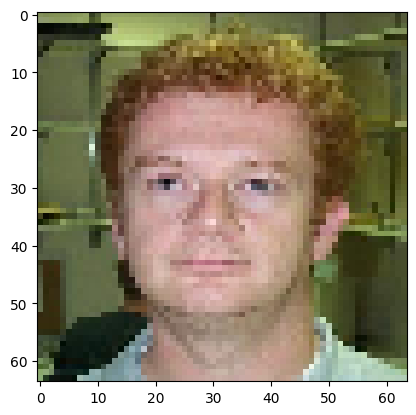

In [11]:
n = 1000
plt.imshow(x_test[n])
print("Preditcted: ",labels[np.argmax(predicted_value[n])])
print("Actual: ", labels[np.argmax(y_test[n])])